Constants

In [11]:
import sys
from utilis import getFitness, loadCostFile, loadFlowFile, getAverage
from selections import Selection
from specimen import Specimen
from crossover import Crossover
import matplotlib.pyplot as plt
import statistics

# EASY
# cost_file = "flo_dane_v1/easy_cost.json"
# flow_file = "flo_dane_v1/easy_flow.json"
# machinesNumber = 9
# r = 3
# c = 3

#FLAT
# cost_file = "flo_dane_v1/flat_cost.json"
# flow_file = "flo_dane_v1/flat_flow.json"
# machinesNumber = 12
# r = 1
# c = 12

#HARD
cost_file = "flo_dane_v1/hard_cost.json"
flow_file = "flo_dane_v1/hard_flow.json"
machinesNumber = 24
r = 5
c = 6

costList = loadCostFile(cost_file, machinesNumber)
flowList = loadFlowFile(flow_file, machinesNumber)

Population

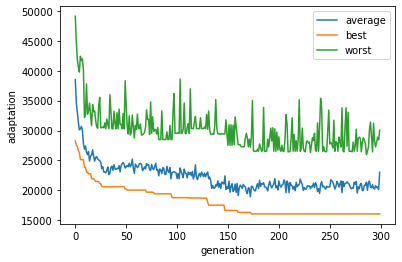


best  16060
worst  49108
average  22278.63
final standard  2429.89


In [12]:
for tries in range(1):
    populationNum = 100
    isPrintingGraph = True
    numOfGenerations = 300
    population = []
    best_list = []
    average_list = []
    worst_list = []
    bestest = sys.maxsize * 2 + 1
    worstest = -1
    numOfElitePairs = 0
    max_fitness = -1
    tournament_size = 20
    beta = 200

    for i in range(populationNum):
        temp = Specimen(c,r,machinesNumber)
        temp.generateMachines()
        population.append((temp, getFitness(costList,flowList,temp,machinesNumber)))
        if population[i][1] >= max_fitness:
            max_fitness = population[i][1]

    for gen in range(numOfGenerations):
        select = Selection(population)
        next_gen = []
        best = sys.maxsize * 2 + 1
        worst = -1
        sum = 0

        for specimen in population:
            sum += specimen[1]
            if specimen[1] < best:
                best = specimen[1]
                if best < bestest:
                    bestest = best
            if specimen[1] > worst:
                worst = specimen[1]
                if worst > worstest:
                    worstest = worst

        if gen != numOfGenerations - 1:
            best_indexes = select.getElites(numOfElitePairs)

            for i in best_indexes:
                next_gen.append(population[i])

            remainingNum = populationNum - 2*numOfElitePairs

            for i in range(int(remainingNum/2)):
                # comment if every generation is random and depending on which selection is active
                p1_index = select.tournament(tournament_size)
                p2_index = select.tournament(tournament_size)
                # p1_index = select.roulette(max_fitness, beta)
                # p2_index = select.roulette(max_fitness, beta)

                while p1_index == p2_index:
                    p2_index = select.tournament(tournament_size)
                    # p2_index = select.roulette(max_fitness, beta)
                # end comment if gen are random

                cross = Crossover(population, c, r, machinesNumber)
                c1_machines, c2_machines = cross.single_point(p1_index, p2_index)

                child1 = Specimen(c,r,machinesNumber)
                child2 = Specimen(c,r,machinesNumber)
                child1.inheritMachines(c1_machines)
                child2.inheritMachines(c2_machines)
                child1.checkMutation1()
                child2.checkMutation1()

                # uncomment if every generation is random
                # child1.generateMachines()
                # child2.generateMachines()

                next_gen.append((child1, getFitness(costList,flowList,child1,machinesNumber)))
                next_gen.append((child2, getFitness(costList,flowList,child2,machinesNumber)))

            population = next_gen

        average = sum / populationNum

        # print("Average: " + str(average))
        # print("Best: " + str(best))
        # print("Worst: " + str(worst))

        average_list.append(average)
        best_list.append(best)
        worst_list.append(worst)
        # print(".", end=' ')

    if isPrintingGraph:
        plt.plot(range(numOfGenerations), average_list, label = "average")
        plt.plot(range(numOfGenerations), best_list, label = "best")
        plt.plot(range(numOfGenerations), worst_list, label = "worst")
        
        plt.xlabel('generation')
        plt.ylabel('adaptation')
        plt.legend()

        plt.show()

    all_time_average = round(getAverage(average_list), 2)
    std = round(statistics.pstdev(average_list),2)
    print()
    print("best ", bestest)
    print("worst ", worstest)
    print("average ", all_time_average)

    # print("final average ", average_list.pop(len(average_list) - 1))
    # print("final best ", best_list.pop(len(best_list) - 1))
    # print("final worst ", worst_list.pop(len(worst_list) - 1))
    print("final standard ", std)